#### Introduction
In this article, I will compare the results of appllying a strategy to a single stock and a portfolio of stocks.

Before we deep dive into  how, let us understand why is it important for us to look into portfolio of stocks.
1. A portfolio reduces risk as opposed to just applying a strategy to a single stock.
2. Optimizing the portfolio can result in higher returns and reduces overall risk (Increases Sharpe Ratio)

#### Steps to be followed
1. Get the data
2. Organise the data
3. Apply the strategy and generate positions
4. Conclusion
5. Next steps

In [142]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import yfinance as yf
import nsepy
import pyfolio



In [151]:
!pip install --upgrade nsepy

In [143]:
# get daily data from yfinance
def get_daily_data(symbol, start, end):
    #data = yf.download(tickers=symbol, start=start, end=end)
    data = nsepy.get_history(symbol=symbol, start=start, end=end)
    return data

# implement any strategy you like across all stocks in your portfolio
# in this strategy
def ma(data,ma1,ma2,optimize=False):
    data["bnh_returns"] = np.log(data["Close"]/data["Close"].shift())
    if optimize:
        # create a list of ma1 and ma2 value and call macd function again
        # select ma1 and ma2 values for max returns and max sharpe ratio
        ma1 = list(np.arange(1,15,1))
        ma2 = list(np.arange(2,31,2))
        for a1 in ma1:
            for a2 in ma2:
                print(a1,a2)
    
    # calculating moving averages
    data['ma_short'] = data['Close'].ewm(span=ma1).mean()  
    data['ma_long'] = data['Close'].ewm(span=ma2).mean()

    # creating positions
    # data["position"] = [0]*len(data)
    data['position'] = np.where(data["ma_short"] > data["ma_long"], 1, 0)    
    data["strategy_returns"] = data["bnh_returns"] * data["position"]
    strategy_returns = list(data["strategy_returns"].cumsum())[-1]
    bnh_returns = list(data["bnh_returns"].cumsum())[-1]
    sharpe_ratio = 0.0                                               # update this line of code
    
    return [data["strategy_returns"], strategy_returns, bnh_returns, sharpe_ratio, ma1, ma2]


TCS
           Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                       
2017-12-08    TCS     EQ     2617.25  2618.00  2645.00  2597.00  2600.00   
2017-12-11    TCS     EQ     2601.50  2608.35  2672.65  2608.35  2670.00   
2017-12-12    TCS     EQ     2661.10  2661.00  2662.00  2607.40  2609.55   
2017-12-13    TCS     EQ     2612.15  2611.40  2651.45  2601.00  2633.50   
2017-12-14    TCS     EQ     2628.40  2632.00  2632.00  2531.10  2558.20   
...           ...    ...         ...      ...      ...      ...      ...   
2022-01-10    TCS     EQ     3853.50  3978.00  3978.00  3861.00  3884.00   
2022-01-11    TCS     EQ     3879.85  3856.00  3925.00  3856.00  3917.00   
2022-01-12    TCS     EQ     3915.90  3925.00  3929.00  3836.55  3857.00   
2022-01-13    TCS     EQ     3859.90  3918.00  3923.00  3857.00  3898.00   
2022-01-14    TCS     EQ     3897.90  3877.85  3977.00  3860.05  3965.35   

       

<AxesSubplot:>

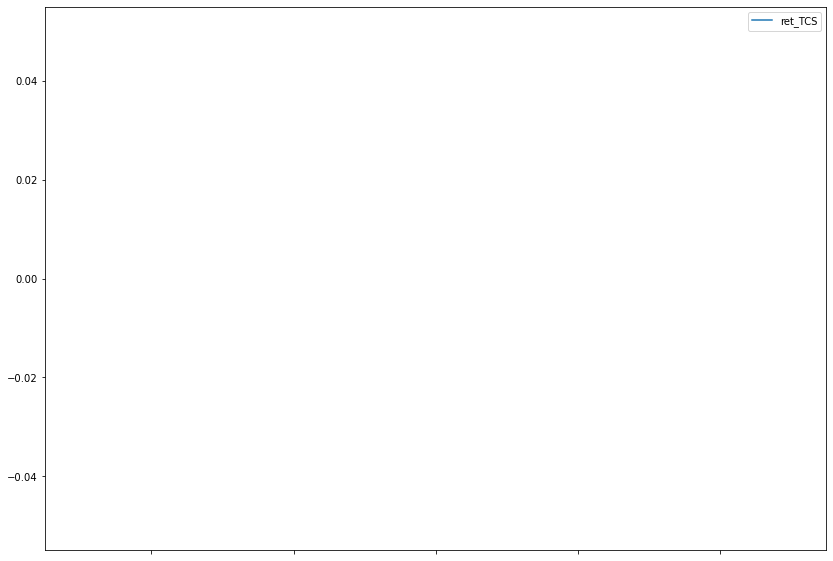

In [154]:
days = 500
end = dt.today()
start = end - pd.Timedelta(days=1500)
#portfolio_stocks = ["TSLA","AMZN","GOOG","AXP","MSFT","STT"]

portfolio_stocks = ["TCS"]

portfolio_daily_returns = pd.DataFrame()


for stock in portfolio_stocks:
    print(stock)
    data = get_daily_data(stock, start, end)
    print(data)
    calculations = ma(data,ma1 = 2, ma2 = 7)
    portfolio_daily_returns["ret_"+stock] = calculations[1]
    
portfolio_daily_returns.cumsum().plot(figsize=(14,10))


In [21]:
??np.arange

In [22]:
len(ma1)

14

In [23]:
len(ma2)

15

In [152]:
data = nsepy.get_history(symbol="SBIN", start=start, end=end)

In [153]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2017-12-08,SBIN,EQ,316.40,316.60,318.85,312.10,313.20,313.10,314.65,16418832,5.166222e+14,111096,5919024,0.3605
2017-12-11,SBIN,EQ,313.10,315.95,319.30,315.10,318.05,318.40,317.56,14014369,4.450430e+14,123100,5499869,0.3924
2017-12-12,SBIN,EQ,318.40,317.75,320.50,314.65,318.00,318.45,317.60,17658856,5.608382e+14,125783,7646507,0.4330
2017-12-13,SBIN,EQ,318.45,316.15,318.95,311.15,313.35,313.30,316.11,17540585,5.544833e+14,107381,6601721,0.3764
2017-12-14,SBIN,EQ,313.30,314.30,315.40,309.50,313.85,314.00,312.71,13894451,4.344972e+14,90600,3065146,0.2206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,SBIN,EQ,491.25,493.35,504.95,492.50,504.75,503.65,499.62,15832274,7.910180e+14,178755,4821092,0.3045
2022-01-11,SBIN,EQ,503.65,503.00,507.80,499.25,505.75,505.95,504.20,16107950,8.121696e+14,214059,4937902,0.3066
2022-01-12,SBIN,EQ,505.95,509.90,513.50,508.50,509.95,510.25,511.05,14489616,7.404903e+14,178769,6119939,0.4224
